In [1]:
import pathlib
import os

import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

In [2]:
import pymysql

In [3]:
db = pymysql.connect(host='localhost',
                     user='root',
                     password='password',
                     database='chicago')
cursor = db.cursor()

In [4]:
sqlcom ="SELECT * FROM weekday_eveningPeak"
df= pd.read_sql(sqlcom, con=db)
print(df)

/opt/anaconda3/envs/python/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


             node_id        lat         lon            timestamp value_hrf
0       001e0610ba13  41.751238   -87.71299  2019/09/30 16:00:00     56.72
1       001e06113acb  41.839066  -87.665685  2019/09/30 16:00:03     56.72
2       001e0610ba46  41.878377  -87.627678  2019/09/30 16:00:04     56.72
3       001e06118295  41.820972  -87.802435  2019/09/30 16:00:04     62.74
4       001e0610ee5d  41.923996  -87.761072  2019/09/30 16:00:05     62.74
...              ...        ...         ...                  ...       ...
106024  001e061146ba   41.96759   -87.76257  2019/10/04 20:59:55     56.72
106025  001e061182a7  41.691803  -87.663723  2019/10/04 20:59:55     66.26
106026  001e06113a24  41.788979  -87.597995  2019/10/04 20:59:56     56.72
106027  001e0610ba46  41.878377  -87.627678  2019/10/04 20:59:57     62.74
106028  001e0610ba15  41.722457   -87.57535  2019/10/04 20:59:59     56.72

[106029 rows x 5 columns]


In [5]:
# dateArr=[['2019/09/30 16','2019/09/30 18'],
#          ['2019/10/01 16','2019/10/01 18'],
#          ['2019/10/02 16','2019/10/02 18'],
#          ['2019/10/03 16','2019/10/03 18'],
#          ['2019/10/04 16','2019/10/04 18']]
# dataArr=[]
# for item in dateArr:
#     sqlcom ="SELECT sound_node.node_id,sound_node.lat,sound_node.lon,delsound.timestamp,delsound.value_hrf FROM delsound,sound_node WHERE delsound.node_id=sound_node.node_id and TIMESTAMP between '"+item[0]+"%' and '"+item[1]+"%'" 
#     print(sqlcom)
#     df= pd.read_sql(sqlcom, con=db)
#     print(df)


In [6]:
from decimal import Decimal
dict={}
for i in range(0,len(df)):
    key=df.iloc[i]['node_id']
    lat=df.iloc[i]['lat']
    lon=df.iloc[i]['lon']
    value=float(df.iloc[i]['value_hrf'])
    
    if key in dict:
        tempDict=dict.get(key)
        valueTemp=tempDict["value"]
        valueTemp.append(value)
        dict[key]=tempDict 
    else:
        dict[key]={"value":[value],"lon":lon,"lat":lat}

temp={}
for key in dict:
    tempDict=dict.get(key)
#     tempDict['average']=Decimal(np.mean(tempDict["value"])).quantize(Decimal('0.00'))
    tempDict['average']=np.mean(tempDict["value"])
    temp[key]=tempDict
print(temp)

{'001e0610ba13': {'value': [56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 62.74, 62.74, 56.72, 62.74, 56.72, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 56.72, 62.74, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 62.74, 62.74, 56.72, 62.74, 56.72, 62.74, 62.74, 62.74, 62.74, 62.74, 56.72, 56.72, 55.0, 56.72, 62.74, 56.72, 62.74, 56.72, 56.72, 62.74, 62.74, 56.72, 62.74, 62.74, 62.74, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 62.74, 56.72, 62.74, 62.74, 62.74, 62.74, 56.72, 62.74, 62.74, 62.74, 62.74, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 62.74, 56.72, 62.74, 62.74, 

In [7]:
df=pd.DataFrame.from_dict(temp,orient='index')
df

,value,lon,lat,average
001e0610ba13,"[56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56....",-87.71299,41.751238,56.801698
001e06113acb,"[56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.7...",-87.665685,41.839066,58.000936
001e0610ba46,"[56.72, 62.74, 62.74, 62.74, 62.74, 62.74, 62....",-87.627678,41.878377,60.477536
001e06118295,"[62.74, 56.72, 62.74, 62.74, 62.74, 62.74, 62....",-87.802435,41.820972,61.275843
001e0610ee5d,"[62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 56....",-87.761072,41.923996,58.029936
001e06113a24,"[56.72, 56.72, 55.0, 55.0, 56.72, 56.72, 56.72...",-87.597995,41.788979,56.718783
001e06113ace,"[55.0, 55.0, 56.72, 56.72, 55.0, 56.72, 56.72,...",-87.617298,41.83107,57.323968
001e0610f732,"[68.76, 68.76, 68.76, 68.76, 68.76, 68.76, 70....",-87.745817,41.895005,61.044127
001e0610ba15,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.57535,41.722457,56.666445
001e0610f6db,"[56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56....",-87.598677,41.791329,57.245971


In [8]:
df.shape

(33, 4)

In [9]:
df['average']

001e0610ba13    56.801698
001e06113acb    58.000936
001e0610ba46    60.477536
001e06118295    61.275843
001e0610ee5d    58.029936
001e06113a24    56.718783
001e06113ace    57.323968
001e0610f732    61.044127
001e0610ba15    56.666445
001e0610f6db    57.245971
001e06113d20    57.602479
001e06117b44    63.127643
001e061184a3    61.729312
001e0610e538    58.691725
001e061144be    56.521402
001e0610ee43    59.017631
001e0610ee36    58.264027
001e061146ba    57.106490
001e0610bbe5    57.653637
001e0610f05c    61.016952
001e0611441e    58.083556
001e061146cb    58.203475
001e061130f4    57.611965
001e061182a7    62.624123
001e061183f5    62.129618
001e0610bc10    90.774770
001e06112e77    56.927669
001e06113ad8    57.559400
001e0611536c    58.340682
001e0610f703    59.294694
001e06113107    57.154187
001e061144cd    56.561794
001e0611462f    56.692614
Name: average, dtype: float64

In [10]:
df['lat'].astype(float)

001e0610ba13    41.751238
001e06113acb    41.839066
001e0610ba46    41.878377
001e06118295    41.820972
001e0610ee5d    41.923996
001e06113a24    41.788979
001e06113ace    41.831070
001e0610f732    41.895005
001e0610ba15    41.722457
001e0610f6db    41.791329
001e06113d20    41.892003
001e06117b44    41.721301
001e061184a3    41.714021
001e0610e538    41.736593
001e061144be    41.792543
001e0610ee43    41.788608
001e0610ee36    41.751295
001e061146ba    41.967590
001e0610bbe5    41.736495
001e0610f05c    41.924903
001e0611441e    41.808594
001e061146cb    41.914094
001e061130f4    41.896157
001e061182a7    41.691803
001e061183f5    41.692703
001e0610bc10    41.736314
001e06112e77    41.786756
001e06113ad8    41.866786
001e0611536c    41.885750
001e0610f703    41.871480
001e06113107    41.751142
001e061144cd    41.874200
001e0611462f    41.823527
Name: lat, dtype: float64

In [11]:
Chicago_Streets_Shapefiles = '.../street-chicago.shp'
Chicago_Boundary_Shapefile = '.../il-chicago.shp'

Text(0.5, 1.0, 'Sound level at evening peak in Chicago on weekdays')

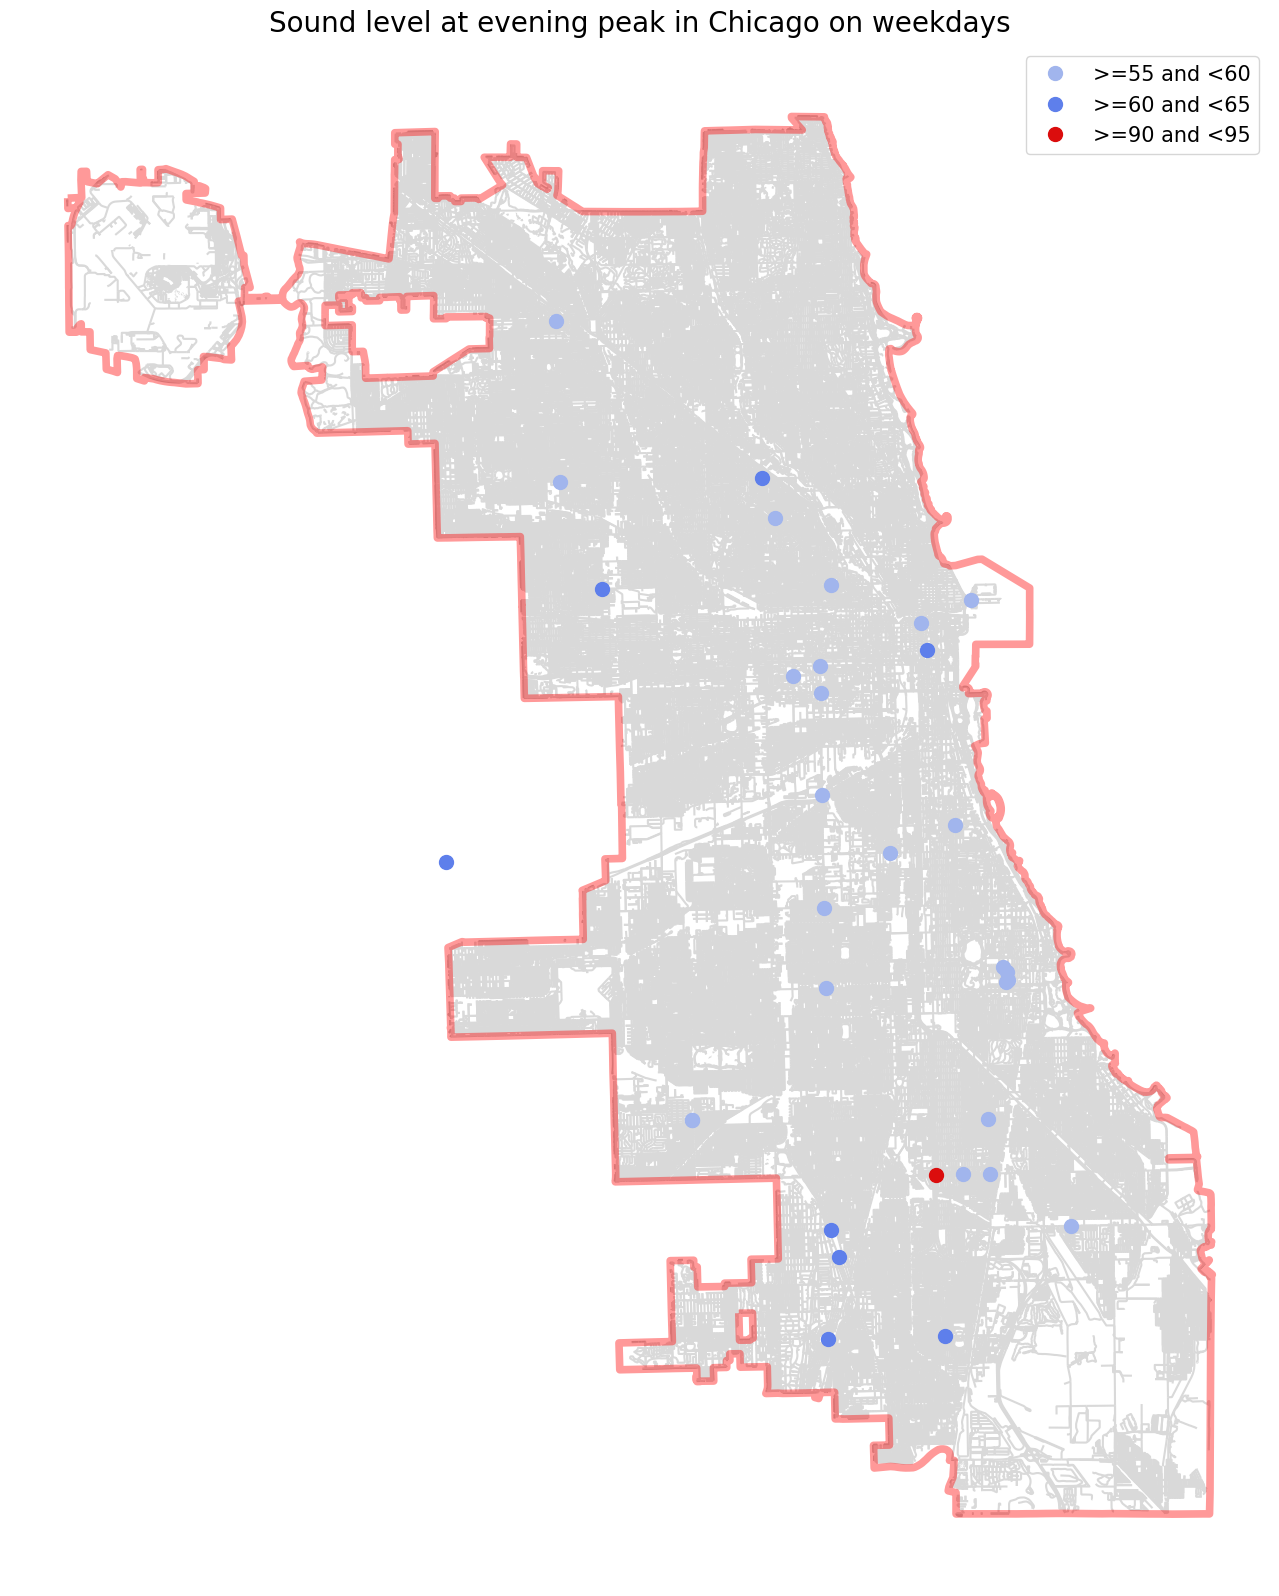

In [13]:
plt.style.use('default')

# Read street information
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)
f, ax = plt.subplots(1, figsize=(20, 20))

#  Draw the streets of Chicago
streetmap.plot(ax=ax, color='silver', zorder = 0)

# Read boundary information
boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Draw the boundaries of Chicago
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

colorDict={}

for i in range(0, len(df)):
    if df.iloc[i]['average']<50:
        color="#a3a6fa"
        label='<50'
    elif df.iloc[i]['average']>=50 and df.iloc[i]['average']<55:
        color="#FFA0D0"
        label='>=50 and <55'
    elif df.iloc[i]['average']>=55 and df.iloc[i]['average']<60:
        color="#a1b5ed"
        label='>=55 and <60'
    elif df.iloc[i]['average']>=60 and df.iloc[i]['average']<65:
        color="#5e7feb"
        label='>=60 and <65'
    elif df.iloc[i]['average']>=65 and df.iloc[i]['average']<70:
        color="#f4ff75"
        label='>=65 and <70'
    elif df.iloc[i]['average']>=70 and df.iloc[i]['average']<75:
        color = "#ffa43b"
        label='>=70 and <75'
    elif df.iloc[i]['average']>=75 and df.iloc[i]['average']<80:
        color="#B20059"
        label='>=75 and <80'
    elif df.iloc[i]['average']>=80 and df.iloc[i]['average']<85:
        color = "#155c09"
        label='>=80 and <85'
    elif df.iloc[i]['average']>=85 and df.iloc[i]['average']<90:
        color="#ae00ff"
        label='>=85 and <90'
    elif df.iloc[i]['average']>=90 and df.iloc[i]['average']<95:
        color="#db0d0d"
        label='>=90 and <95'
    else:
        print(df.iloc[i]['average'])
        color="#0d89b3"
        label='>=95 and <100'
    if  color in colorDict:
        label=""
    else:
        colorDict[color]=label

    ax.plot(float(df.iloc[i]['lon']),float(df.iloc[i]['lat']), marker='o', label=label, color=color,linestyle='', ms=10, zorder = 10)
#     print(df.iloc[i]['average'],float(df.iloc[i]['lon']),float(df.iloc[i]['lat']))
    
# ax.legend(),set legend
ax.legend()
plt.legend(loc=1,fontsize = 15)

title='Sound level at evening peak in Chicago on weekdays'

# Turn off the X and Y axes
ax.set_axis_off()
ax.set_title(title, fontsize = 20, fontdict = {'verticalalignment':'bottom'})
